In [21]:
import sys
import os
from pathlib import Path
import pandas as pd

# Configurer le chemin
project_root = Path().resolve().parent
sys.path.append(str(project_root))

In [22]:
# Imports
from src.data.expense_data_processing import preprocess_expense_data
from src.features.expense_analysis import calculate_expense_metrics
from src.visualization.expense_visualizations import plot_yearly_expense

# Chargement des données
df = pd.read_csv('C:/Code/Projets_perso/projets/BelgiumSupplierScope/data/processed/df_clean.csv')


In [23]:
# Solution  - depuis un notebook
PROJECT_ROOT = Path.cwd().parent  # Si je suis  dans mon notebooks/
                                 # .parent me ramène à la racine

print(f"Racine du projet détectée: {PROJECT_ROOT}")  # Vérifiez que c'est correct

# Chemin complet vers les rapports
REPORTS_PATH = PROJECT_ROOT / "reports"

Racine du projet détectée: c:\code\projets_perso\projets\BelgiumSupplierScope


In [24]:
# Prétraitement
expense_df = preprocess_expense_data(df)

# Calcul des métriques
metrics = calculate_expense_metrics(expense_df)

"""Sauvegarde les données dans la structure reports/"""
# Chemins complets
tables_dir = REPORTS_PATH / "tables" / "expense"
figures_dir = REPORTS_PATH / "figures" / "expense"
    
# Création des dossiers (si inexistants)
tables_dir.mkdir(parents=True, exist_ok=True)
figures_dir.mkdir(parents=True, exist_ok=True)
    
# Sauvegarde des données
metrics['yearly_expense'].to_csv(
 tables_dir / "yearly_expense.csv",
index=False
)

# Visualisation
plot_yearly_expense(
    metrics['yearly_expense'], 
    figures_dir / "yearly_expense.png"
)

    
print(f"Données sauvegardées dans : {tables_dir}")

Données sauvegardées dans : c:\code\projets_perso\projets\BelgiumSupplierScope\reports\tables\expense


In [25]:
import os
print(os.getcwd())  # Vérifiez où Python cherche les fichiers

c:\code\projets_perso\projets\BelgiumSupplierScope\notebooks


### Nombre de marchés par année & Dépense moyenne/médiane par marché

In [26]:
from src.features.expense_analysis import calculate_all_expense_metrics
from src.visualization.expense_visualizations import plot_market_metrics
from pathlib import Path

# Chemins
REPORTS_PATH = Path.cwd().parent / "reports"

# Calcul des métriques
metrics = calculate_all_expense_metrics(df)

# Sauvegarde des résultats
market_metrics = metrics['market_metrics']
market_metrics.to_csv(
    REPORTS_PATH / "tables" / "expense" / "market_metrics.csv",
    index=False
)

# Visualisation
plot_market_metrics(
    market_metrics,
    save_path=REPORTS_PATH / "figures" / "expense" / "market_metrics.png"
)

### Répartition des dépenses par type d'acheteur

In [27]:
from src.features.expense_analysis import calculate_buyer_metrics
from src.visualization.expense_visualizations import plot_buyer_metrics
from pathlib import Path

# Chemins
REPORTS_PATH = Path.cwd().parent / "reports"

# Calcul des métriques
buyer_metrics = calculate_buyer_metrics(df)

# Sauvegarde
buyer_metrics['by_buyertype'].to_csv(
    REPORTS_PATH / "tables" / "expense" / "buyer_by_type.csv",
    index=False
)
buyer_metrics['by_activity'].to_csv(
    REPORTS_PATH / "tables" / "expense" / "buyer_by_activity.csv", 
    index=False
)

# Visualisation
plot_buyer_metrics(
    buyer_metrics,
    save_dir=REPORTS_PATH / "figures" / "expense"
)

### Analyse par CPV

#### Inspecter la colonne CPV

In [28]:
df.columns

Index(['persistent_id', 'tender_id', 'lot_id', 'bid_id', 'bidder_id',
       'bidder_masterid', 'bidder_name', 'bidder_nuts', 'bidder_city',
       'bidder_country', 'bidder_type', 'bid_iswinning', 'bid_price',
       'bid_issubcontracted', 'bid_isconsortium', 'buyer_id', 'buyer_name',
       'buyer_nuts', 'buyer_city', 'buyer_country', 'buyer_mainactivities',
       'buyer_buyertype', 'tender_title', 'tender_proceduretype',
       'tender_nationalproceduretype', 'tender_isawarded', 'tender_supplytype',
       'tender_selectionmethod', 'tender_awarddecisiondate',
       'tender_estimatedprice', 'tender_finalprice', 'tender_cpvs',
       'tender_maincpv', 'tender_year', 'tender_recordedbidscount',
       'lot_title', 'lot_status', 'lot_estimatedprice', 'lot_bidscount', 'cri',
       'corr_singleb', 'corr_proc', 'corr_nocft', 'corr_decp',
       'corr_buyer_concentration', 'currency', 'source', 'notice_url'],
      dtype='object')

In [29]:
df_cpv=df[['tender_cpvs','tender_maincpv']]
print(df_cpv)

                                          tender_cpvs tender_maincpv
0                                           71000000,              t
1                                  45324000,90700000,              t
2                                  45324000,90700000,              t
3                                  45324000,90700000,              t
4                                  45324000,90700000,              t
...                                               ...            ...
188837                                      64200000,              t
188838           22451000,64000000,22455000,22456000,              t
188839           22451000,64000000,22455000,22456000,              t
188840           22451000,64000000,22455000,22456000,              t
188841  22111000,22112000,48190000,22113000,14820000,              t

[188842 rows x 2 columns]


In [30]:
from src.features.cpv_analysis import analyze_cpv_with_reference
from src.visualization.cpv_visualizations import plot_hierarchical_cpv
from src.visualization.cpv_visualizations import plot_sunburst_cpv

# Configuration des chemins
CPV_REF_PATH = Path("C:/Code/Projets_perso/projets/BelgiumSupplierScope/data/raw/cpv_2008_fr.xls")
REPORTS_PATH = Path.cwd().parent / "reports"

# Analyse avec référentiel
cpv_results = analyze_cpv_with_reference(df, CPV_REF_PATH)

# Export des données
cpv_results['by_2dig'].to_csv(
    REPORTS_PATH / "tables" / "cpv" / "by_2dig.csv",
    index=True
)
cpv_results['by_3dig'].to_csv(
    REPORTS_PATH / "tables" / "cpv" / "by_3dig.csv",
    index=True
)

# Visualisations
plot_hierarchical_cpv(
    cpv_results,
    save_dir=REPORTS_PATH / "figures" / "cpv"
)

# Visualisation interactive (nécessite plotly)
plot_sunburst_cpv(
    cpv_results,
    save_path=REPORTS_PATH / "figures" / "cpv" / "cpv_sunburst.html"
)

True

### Comparaison prix estimé/final

In [31]:
from src.data.expense_data_processing import process_price_comparison
from src.features.expense_analysis import calculate_price_differences
from src.features.expense_analysis import analyze_by_procedure_type

df_clean=df

# Exécuter l'analyse
output_dir = "C:/Code/Projets_perso/projets/BelgiumSupplierScope/reports"
df_prices, price_stats = process_price_comparison(df_clean, output_dir)

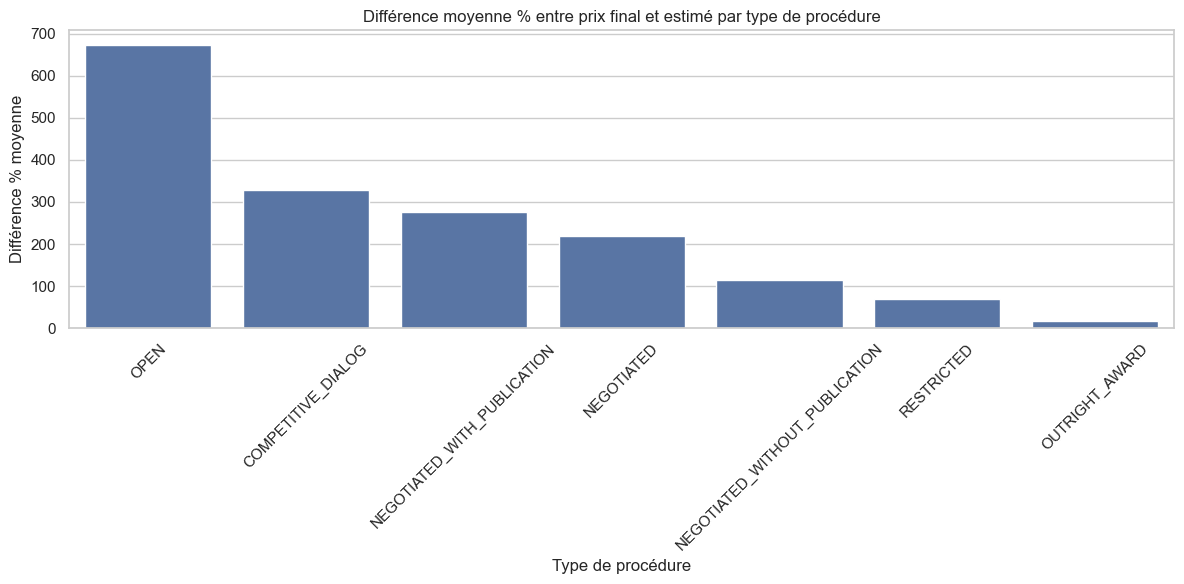

In [32]:
import matplotlib.pyplot as plt # Corrected import for matplotlib.pyplot
import pandas as pd
import seaborn as sns # Assuming you also want to use seaborn, as 'sns.barplot' is present

data = pd.read_csv('C:/Code/Projets_perso/projets/BelgiumSupplierScope/reports/tables/expense/price_comparison_stats.csv')

# Make sure 'price_stats' DataFrame is defined.
# Based on your code, it seems you intended to assign 'data' to 'price_stats'
# or load the data directly into 'price_stats'. Let's assume 'price_stats'
# is the DataFrame containing the relevant columns for the plot.
# If 'data' is the correct DataFrame, replace 'price_stats' with 'data'.
price_stats = data # Assuming price_stats is the DataFrame loaded from the CSV

plt.figure(figsize=(12, 6))
sns.barplot(data=price_stats,
            x='tender_proceduretype',
            y='price_difference_pct_mean',
            order=price_stats.sort_values('price_difference_pct_mean', ascending=False)['tender_proceduretype'])
plt.xticks(rotation=45)
plt.title('Différence moyenne % entre prix final et estimé par type de procédure')
plt.ylabel('Différence % moyenne')
plt.xlabel('Type de procédure')
plt.tight_layout()
plt.show() # Add plt.show() to display the plot

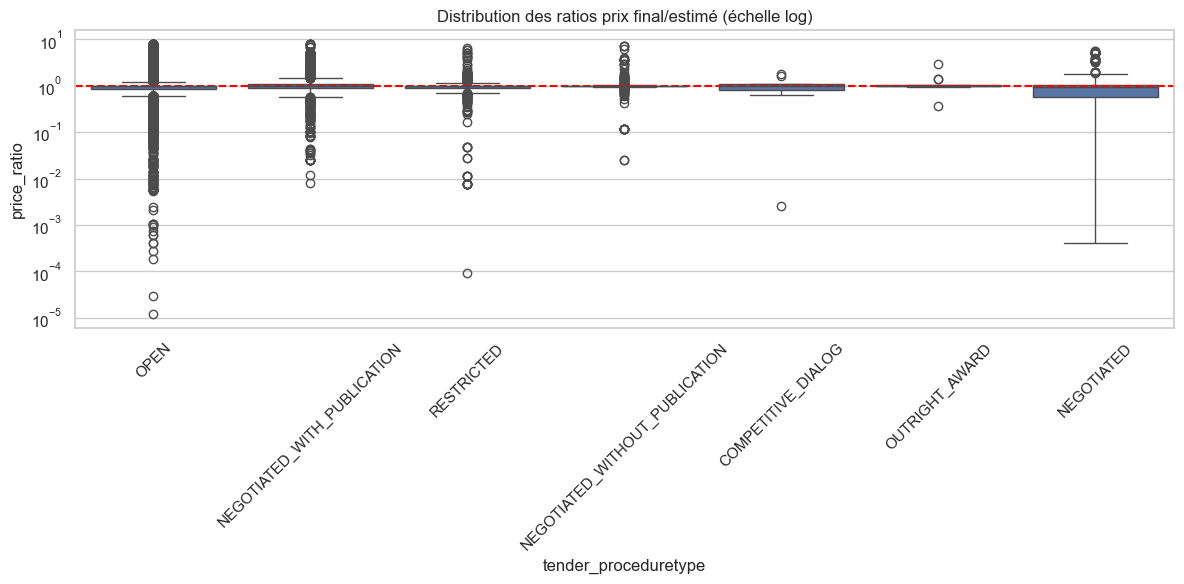

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_prices[df_prices['price_ratio'] < df_prices['price_ratio'].quantile(0.95)],  # Filtrer les outliers
            x='tender_proceduretype',
            y='price_ratio')
plt.axhline(1, color='red', linestyle='--')
plt.yscale('log')
plt.title('Distribution des ratios prix final/estimé (échelle log)')
plt.xticks(rotation=45)
plt.tight_layout()

Text(0.5, 1.0, 'Corrélations entre les variables de prix')

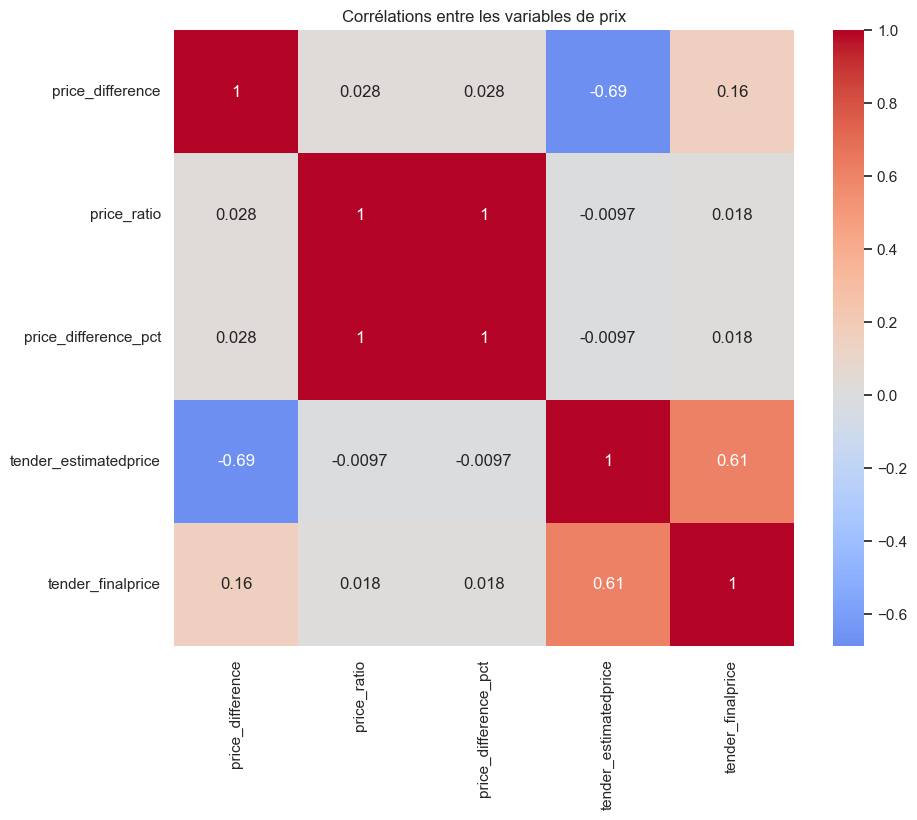

In [34]:
numeric_cols = ['price_difference', 'price_ratio', 'price_difference_pct', 
                'tender_estimatedprice', 'tender_finalprice']
plt.figure(figsize=(10, 8))
sns.heatmap(df_prices[numeric_cols].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Corrélations entre les variables de prix')

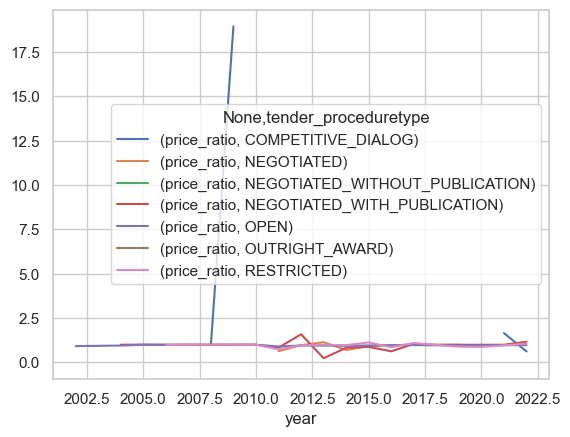

In [35]:
df_prices['year'] = pd.to_datetime(df_prices['tender_awarddecisiondate']).dt.year
price_stats_by_year = df_prices.groupby(['year', 'tender_proceduretype']).agg({
    'price_ratio': 'median'
}).unstack().plot(kind='line')

In [36]:
df_prices.nlargest(10, 'price_difference_pct')[
    ['tender_proceduretype', 'tender_title', 
     'tender_estimatedprice', 'tender_finalprice',
     'price_difference_pct']]

,tender_proceduretype,tender_title,tender_estimatedprice,tender_finalprice,price_difference_pct
135784,OPEN,Fourniture de gasoil de chauffage et de pellet,210.0,2649856.0,1.261736e+06
268,OPEN,NaN,400.0,702479.0,1.755198e+05
11649,NEGOTIATED_WITH_PUBLICATION,NaN,400.0,691486.0,1.727715e+05
4971,OPEN,NaN,375.0,420634.0,1.120691e+05
8239,OPEN,NaN,400.0,430958.0,1.076395e+05
4975,OPEN,NaN,728.0,760230.0,1.043272e+05
4972,OPEN,NaN,850.0,878811.0,1.032895e+05
3392,OPEN,NaN,108.0,108200.0,1.000852e+05
3830,OPEN,NaN,205.0,205000.0,9.990000e+04
155660,OPEN,Support for policy and market development for ...,1800.0,1800000.0,9.990000e+04


([0, 1, 2, 3, 4],
 [Text(0, 0, '(99.999, 240000.0]'),
  Text(1, 0, '(240000.0, 480000.0]'),
  Text(2, 0, '(480000.0, 1050000.0]'),
  Text(3, 0, '(1050000.0, 4000000.0]'),
  Text(4, 0, '(4000000.0, 1120000000.0]')])

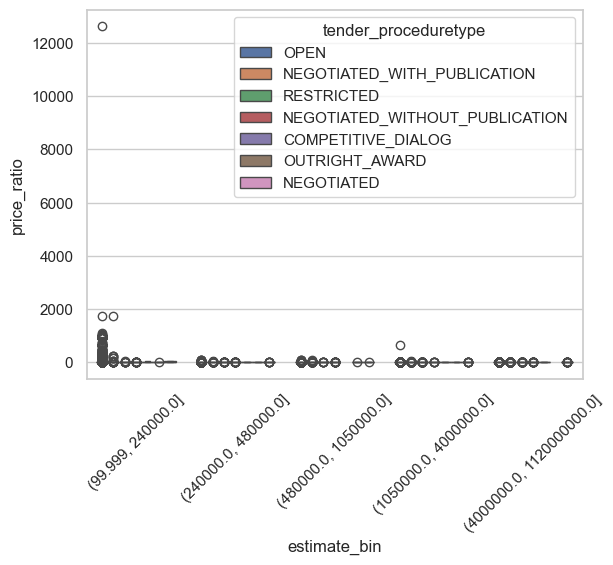

In [37]:
df_prices['estimate_bin'] = pd.qcut(df_prices['tender_estimatedprice'], q=5)
sns.boxplot(data=df_prices, 
            x='estimate_bin', 
            y='price_ratio',
            hue='tender_proceduretype')
plt.xticks(rotation=45)

**Interprétation**:

* Procédures OPEN :

    * Ratio moyen très élevé (7.74) mais médiane à 1

    * Indique quelques cas extrêmes de dépassement massif

    * À investiguer : existence de lots avec modifications substantielles

* Procédures RESTRICTED :

    * Grande variabilité (std=166M€)

    * Pourrait indiquer des estimations peu fiables ou des modifications complexes

* NEGOTIATED_WITH_PUBLICATION :

    * Seul type avec différence moyenne positive

    * Mérite une analyse spécifique des cas gagnants